In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import exp10, logsumexp
from scipy.stats import nbinom

In [2]:
#color map
TableauColor = { 
        'red':           (0.839, 0.153, 0.157),
        'blue':          (0.122, 0.467, 0.706),
        'green':         (0.173, 0.627, 0.173),
        'orange':        (1.000, 0.498, 0.055),
        'peach':         (1.000, 0.733, 0.471),
        'purple':        (0.580, 0.404, 0.741),
        'lightpurple':   (0.773, 0.690, 0.835),
        'violet':        (0.890, 0.467, 0.761),
        'peagreen':      (0.737, 0.741, 0.133),
        'lightpeagreen': (0.859, 0.859, 0.553),
        'aqua':          (0.090, 0.745, 0.812),
        'pink':          (0.969, 0.714, 0.824),
        'salmon':        (1.000, 0.596, 0.588),
        'lightaqua':     (0.620, 0.855, 0.898),
        'lightbrown':    (0.769, 0.612, 0.580),
        'grey50':        (0.498, 0.498, 0.498),
        'grey20':        (0.780, 0.780, 0.780),
        'lightgreen':    (0.596, 0.875, 0.541),
        'brown':         (0.549, 0.337, 0.294),
        'lightblue':     (0.682, 0.780, 0.910),
    }
    
    # We can assign colors to up to Q=10 components with this colormap. if you want more, add more.
colormap = ['orange', 'lightgreen', 'red', 'aqua', 'brown', 'peach', 'blue', 'lightpurple', 'peagreen', 'salmon']

In [3]:
def read_pset3_tbl(file_name):
    pset3_dirc = {}
    pset3_dirc['cell_type'] = []
    pset3_dirc['caraway'] = []
    pset3_dirc['kiwi'] = []
    pset3_dirc['data_points'] = []
    file = open(file_name)
    for line in file:
        if line[0] == "#":
            continue
        line_list = line.split()
        pset3_dirc['cell_type'].append(int(line_list[1]))
        pset3_dirc['caraway'].append(int(line_list[2]))
        pset3_dirc['kiwi'].append(int(line_list[3]))
        pset3_dirc['data_points'].append((int(line_list[2]), int(line_list[3])))
    pset3_dirc['data_points'] = np.array(pset3_dirc['data_points'])
    pset3_dirc['log_data'] = np.log10(pset3_dirc['data_points'])
    return pset3_dirc

In [4]:
def plot_cluster_data(centroids, clustered_points, iteration=None, func=None):
    i = 0 
    fig, ax = plt.subplots()
    for i in range(len(clustered_points)):
        entry = str(i)
        color=TableauColor[colormap[i]]
        ax.scatter(clustered_points[entry][:,0],clustered_points[entry][:,1],
                color=color, label=entry)
        i += 1
    ax.scatter(centroids[:,0], centroids[:,1],color='k',
                marker='*', label='centroids')
    ax.set_xlabel('caraway') 
    ax.set_ylabel('kiwi')
    if func == 'log':
        ax.set_xscale("log")
        ax.set_yscale("log")
    if iteration != None:
        ax.set_title("iteration is {}".format(iteration))
    ax.legend()
    return "plot successful"

In [5]:
def K_mean(data_points, K, iterations, Question1=True):
    np.random.seed(1)
    min_x = min(data_points[:,0])
    max_x = max(data_points[:,0])
    min_y = min(data_points[:,1])
    max_y = max(data_points[:,1])
    data_size = len(data_points)
    initial_centroids = (min_x, min_y) + ((max_x-min_x),(max_y-min_y))*np.random.rand(K, 2)
    # initial_centroids = np.array([[   30., 2000. ],
    #                [ 2000., 2000. ],
    #                [  300.,  300. ],
    #                [   30.,   30. ],
    #                [ 2000,    30. ]])
    update_centroids = initial_centroids
    for i in range(iterations): 
        cluster_belong = []
        total_dist = 0
        for index in range(data_size): #go though each points
            coord = data_points[index]
            temp_dist = []
            for centroids in update_centroids:#find the distance of point to centroids 
                dd = np.sqrt((centroids[0] - coord[0])**2 + (centroids[1] - coord[1])**2)
                temp_dist.append(dd)#store the distance of the point to the centroids to a list 
            cluster_to = np.argmin(temp_dist)#find the index of the smallest one

            if i == iterations-1:
                total_dist+=temp_dist[cluster_to]
                #print(total_dist)
                #total_dist.append(temp_dist[cluster_to])
            cluster_belong.append(cluster_to)#store the cluster of the data belonges to
        clustered_data_points = {}
        for j in range(data_size):#cluseter data to a dirc
            try:
                clustered_data_points[str(cluster_belong[j])].append(data_points[j])
            except:
                clustered_data_points[str(cluster_belong[j])] = []
        update_centroids = []
        for k in range(len(clustered_data_points)): #generate the new centroids at this step
            entry = str(k)
            clustered_data_points[entry] = np.array(clustered_data_points[entry])
            update_centroids.append(np.average(clustered_data_points[entry], axis=0))
        update_centroids = np.array(update_centroids)
#         plot_cluster_data(update_centroids, clustered_data_points, i)
    if Question1 == False:
        for l in range(len(clustered_data_points)): #antilog everything
            entry = str(l)
            clustered_data_points[entry] = exp10(clustered_data_points[entry])
        update_centroids = exp10(update_centroids)
    print("the total distance is {}".format(total_dist))
    #print("the total distance is {}".format(np.sqrt(np.sum(total_dist))))
    return update_centroids, clustered_data_points

### Question 1
Wrong cluster figure:
the figuers are showing like this becuase there are cluster in log space of the data point  
but not at the ordinary space. As showing in the second figure, the data points are clustered
as the oridinary space, and plotted to the log space, causing the result of figure 1.  

the total distance is 475195.3430548142


'plot successful'

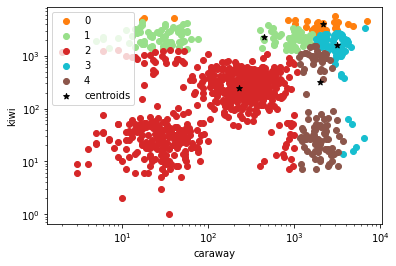

In [6]:
# iteration_list = [1, 2, 5, 10, 20, 50, 100]
# for iteration in iteration_list:
pset3_dirc = read_pset3_tbl('pset3-data.tbl')
update_centroids, clustered_data_points = K_mean(pset3_dirc['data_points'], 5, iterations=20)
plot_cluster_data(update_centroids, clustered_data_points, func='log')

'plot successful'

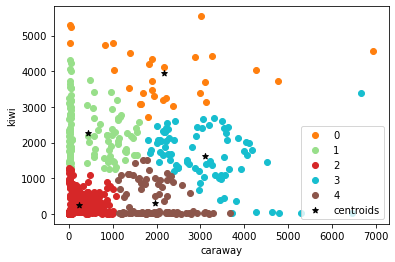

In [7]:
plot_cluster_data(update_centroids, clustered_data_points)

### Question 2
The Mixture negative binomial fitting

In [8]:
def NB_distribution(data_points, Q, Phi, iterations, random_seed=1):
    np.random.seed(random_seed)
    min_x = min(data_points[:,0])
    max_x = max(data_points[:,0])
    min_y = min(data_points[:,1])
    max_y = max(data_points[:,1])
    data_size = len(data_points)
    if random_seed != 0:
        initial_centroids = (min_x, min_y) + ((max_x-min_x),(max_y-min_y))*np.random.rand(Q, 2)
    else:
        initial_centroids = np.array([[   30., 2000. ],
                       [ 2000., 2000. ],
                       [  300.,  300. ],
                       [   30.,   30. ],
                       [ 2000,    30. ]])
    update_centroids = initial_centroids
    Pi_q_prime_init = (1/Q) * np.ones(Q)#initialize π_q'
    Pi_q_prime = Pi_q_prime_init
    validation = [[],[]]
    for itt in range(iterations): 
        P_X_q_prime = []
        
        # start to calculate the posterior (Expectation step)
        for index in range(data_size): #go though each points
            coord = data_points[index]
            P_q_prime = []
            
            # start to use distribution to determine the cluster
            for ic, centroids in enumerate(update_centroids):#find the distribution of point to centroids 
                n = 1/Phi
                p = 1 / (1 + centroids * Phi)
                P_q = np.sum(nbinom.logpmf(coord, n, p))#find P of x to each q
                P_q = np.sum([P_q, np.log(Pi_q_prime[ic])])#times P with π_q
                P_q_prime.append(P_q)#store the P of x to each centroid to list
            
            sum_P_q_prime = logsumexp(P_q_prime)
            P_q_prime = P_q_prime - sum_P_q_prime
            P_X_q_prime.append(P_q_prime)
            
        # start update the new centroids (Maximization step)
        # get the new centroids:
        new_centroids = []
        for j in range(Q):
            top_term = []
            bottom_term = []
            for i, x in enumerate(data_points):
                top_term.append(P_X_q_prime[i][j] + np.log(x))
                bottom_term.append(P_X_q_prime[i][j])
            top_term_sum = logsumexp(top_term, axis=0)
            bottom_term_sum = logsumexp(bottom_term)
            update_centroids[j] = np.exp(top_term_sum) / np.exp(bottom_term_sum)
            # get new Pi_p_prime
            Pi_q_prime[j] = bottom_term_sum / data_size
        validation[0].append(itt)
        validation[1].append(np.sum(bottom_term_sum))
    
        #determine which cluster the data point belonges to
    cluster = {}
    for q in range(Q): #initialize cluster
        cluster[str(q)] = []
    for k in range(data_size): #put datapoint into different cluster based on highest possibility
        cluster_to = np.argmax(P_X_q_prime[k])
        cluster[str(cluster_to)].append(data_points[k])         
    for q in range(Q): #change the content into np.array
        cluster[str(q)] = np.array(cluster[str(q)])
    return cluster, update_centroids, P_X_q_prime, Pi_q_prime, validation

In [9]:
def plot_validation(validation_data_list):
    i = 0
    for data in validation_data_list:
        plt.plot(data[0], data[1], label='rs {}'.format(i))
        plt.xlabel('iteration')
        plt.ylabel('P')
        i += 1
    plt.legend(loc=2, prop={'size': 6})
    plt.show()

'plot successful'

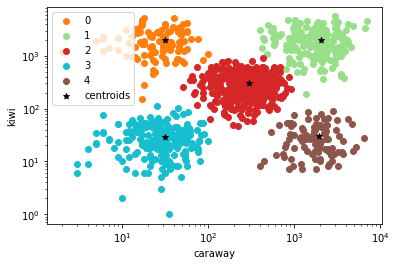

In [10]:
cluster, update_centroids, P_X_q_prime, Pi_q_prime, validation = NB_distribution(pset3_dirc['data_points'],
                                                                     Q=5, Phi=0.3, iterations=10, random_seed=0)
plot_cluster_data(update_centroids, cluster, func='log')

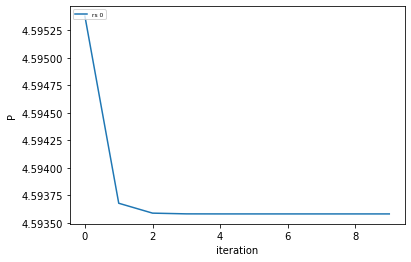

In [11]:
plot_validation([validation])

### Question 2
The mean count of genes and fraction and printed below:

In [12]:
# get the mean and fraction of each cell type
mean_count_Caraway = []
mean_count_Kiwi = []
num_cell_type = []

for i in range(5):
    mean_count_Caraway.append(np.average(cluster[str(i)][:,0]))
    mean_count_Kiwi.append(np.average(cluster[str(i)][:,1]))
    num_cell_type.append(len(cluster[str(i)]))
total_cell_num = np.sum(num_cell_type)
fraction = np.array(num_cell_type) / total_cell_num
print("the mean count of caraway for cell type from 0 to 4 is: {}".format(mean_count_Caraway))
print("the mean count of kiwi for cell type from 0 to 4 is: {}".format(mean_count_Kiwi))
print("the fraction of each cell type to total number is: {}".format(fraction))

the mean count of caraway for cell type from 0 to 4 is: [30.878504672897197, 2053.285714285714, 300.994923857868, 31.834146341463416, 1957.6632653061224]
the mean count of kiwi for cell type from 0 to 4 is: [1980.018691588785, 1979.142857142857, 302.78934010152284, 29.492682926829268, 30.1734693877551]
the fraction of each cell type to total number is: [0.107 0.196 0.394 0.205 0.098]


### Question 2
Change the initial centroid by using different random seeds.  
The initial condition should be placed to the center of the cluster as close as possible as moving the centroid is hard. Initial centroids with large bias could cause extra iterations to fix.

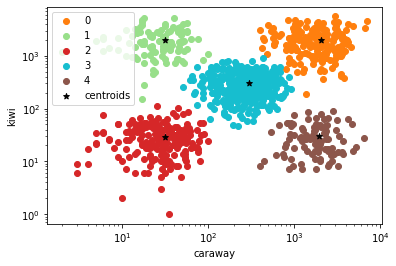

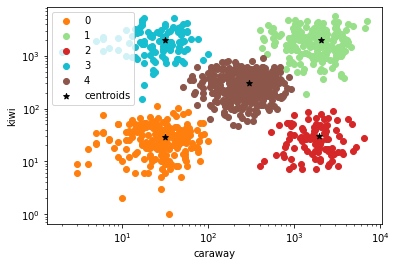

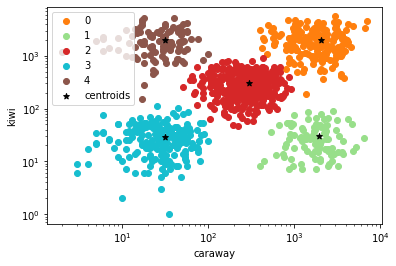

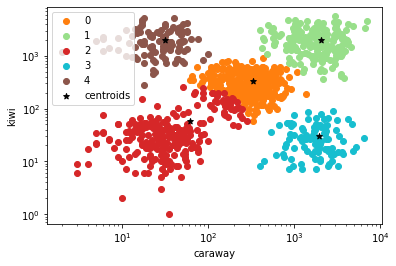

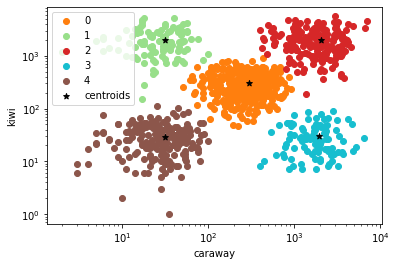

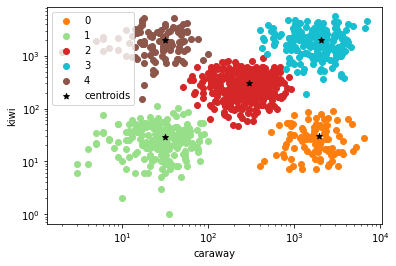

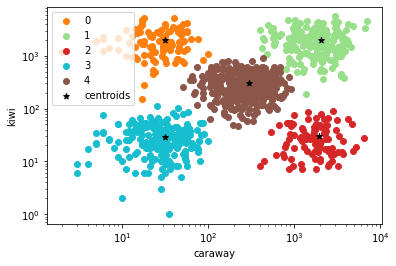

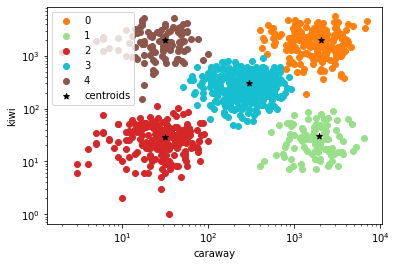

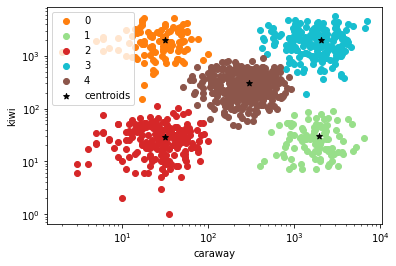

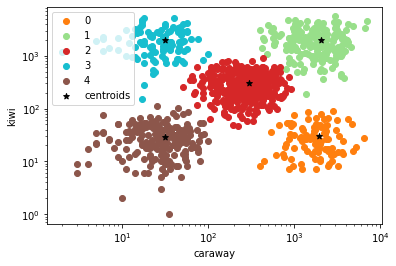

In [13]:
validation_all = []
for i in range(1,11):
    cluster, update_centroids, P_X_q_prime, Pi_q_prime, validation = NB_distribution(pset3_dirc['data_points'],
                                                                         Q=5, Phi=0.3, iterations=30, random_seed=i)
    validation_all.append(validation)
    plot_cluster_data(update_centroids, cluster, func='log')

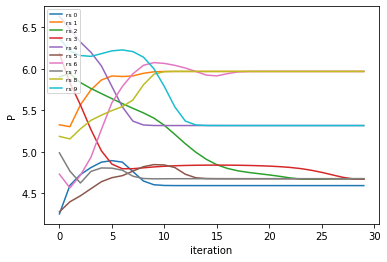

In [14]:
plot_validation(validation_all)

#### Answer to question 2:

Clusters with various initial centroids will convergence after 30 iterations. Different starting position of centroids will result in change various number of iterations to converge. 

### Question 3
Put logged data into the algrithm

the total distance is 327.8127092290731


'plot successful'

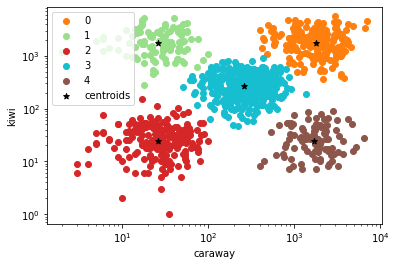

In [15]:
pset3_dirc = read_pset3_tbl('pset3-data.tbl')
update_centroids, clustered_data_points = K_mean(pset3_dirc['log_data'], 5, iterations=20, Question1=False)
plot_cluster_data(update_centroids, clustered_data_points, func='log')